<a href="https://colab.research.google.com/github/Erike-Simon/CESAR-AED/blob/main/shark_attacks_Pernambuco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Engenharia e Análise de Dados - CESAR School**

# **Grupo 1:** Análise exploratória de dados de ataques de tubarão em Pernambuco e no mundo.

- *Erike Simon*
- *Pedro Lins*
- *Manuel Henrique*
- *Gustavo Galvão*
- *Jadeilson Santos*

# Obtenção e tratamento dos dados

## Download

In [ ]:
# PL
# baixando dados do kaggle
!pip install kaggle
!mkdir ~/.kaggle
!echo '{"username":"pedr0ls","key":"d65b610d939db5a205f959a59a9495b7"}' > ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download 'mysarahmadbhat/shark-attacks'
!unzip -o shark-attacks.zip -d 'shark-attacks'
!rm shark-attacks.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists
  0% 0.00/537k [00:00<?, ?B/s]
100% 537k/537k [00:00<00:00, 64.5MB/s]
Archive:  shark-attacks.zip
  inflating: shark-attacks/attacks.csv  


## Configurações iniciais do *dataset*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import warnings
import seaborn as sns
from IPython.display import display
import re
from scipy import stats # para cálculos estatísticos
import plotly.express as px # histograma de idade
import gdown
from google.colab import drive # para acesso ao drive

warnings.filterwarnings("ignore")

In [ ]:
# CARREGANDO DADOS PELO DRIVE
# drive.mount('/content/gdrive')
# basedir = '/content/gdrive/MyDrive/Colab Notebooks/datasets/'

# CARREGANDO DADOS BAIXADOS DO KAGGLE
basedir = '/content/shark-attacks/'

dados = pd.read_csv(basedir + 'attacks.csv', encoding='latin1')
dados.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
0,2017.06.11,2017-06-11,2017.0,Unprovoked,AUSTRALIA,Western Australia,"Point Casuarina, Bunbury",Body boarding,Paul Goff,M,...,N,08h30,"White shark, 4 m","WA Today, 6/11/2017",2017.06.11-Goff.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.11,2017.06.11,6095.0
1,2017.06.10.b,2017-06-10,2017.0,Unprovoked,AUSTRALIA,Victoria,"Flinders, Mornington Penisula",Surfing,female,F,...,N,15h45,7 gill shark,NaN,2017.06.10.b-Flinders.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.10.b,2017.06.10.b,6094.0
2,2017.06.10.a,2017-06-10,2017.0,Unprovoked,USA,Florida,"Ponce Inlet, Volusia County",Surfing,Bryan Brock,M,...,N,10h00,NaN,"Daytona Beach News-Journal, 6/10/2017",2017.06.10.a-Brock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.10.a,2017.06.10.a,6093.0
3,2017.06.07.R,Reported 07-Jun-2017,2017.0,Unprovoked,UNITED KINGDOM,South Devon,Bantham Beach,Surfing,Rich Thomson,M,...,N,NaN,"3m shark, probably a smooth hound","C. Moore, GSAF",2017.06.07.R-Thomson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.07.R,2017.06.07.R,6092.0
4,2017.06.04,2017-06-04,2017.0,Unprovoked,USA,Florida,"Middle Sambo Reef off Boca Chica, Monroe County",Spearfishing,Parker Simpson,M,...,N,NaN,8' shark,"Nine News, 6/7/2017",2017.06.04-Simpson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.04,2017.06.04,6091.0


In [ ]:
dados.drop_duplicates(subset=None, keep='first', inplace=True)

In [ ]:
# Deletando colunas que não serão utilizadas
cols = ['Investigator or Source', 'pdf', 'href formula', 'href', 'original order']
dados.drop(cols , axis=1, inplace=True)

In [ ]:
# PL
# colunas interessantes: Country, Activity, Fatal (Y/N), Species
# retirando espaços em branco das colunas
dados.columns = dados.columns.str.strip()
dados = dados.rename(columns={'Fatal (Y/N)':'Fatal'})

## Exploração de informações e ajustes de dados

In [ ]:
# 'dados1' é o dataset apenas entre 1917-2017
dados1 = dados[dados['Year'] >= 1917]

In [ ]:
# Correção de informações duplicadas em colunas

# Locais de ataque em Pernambuco
dados1["Location"] = dados1["Location"].str.replace("Boa Viagem, Recife", "Boa Viagem")
dados1["Location"] = dados1["Location"].str.replace("Boa Viagem Beach, Recife", "Boa Viagem")
dados1["Location"] = dados1["Location"].str.replace(" Boa Viagem Beach, Recife", "Boa Viagem")
dados1["Location"] = dados1["Location"].str.replace(" Boa Viagem", "Boa Viagem")
dados1["Location"] = dados1["Location"].str.replace("Piedade, Recife", "Piedade")
dados1["Location"] = dados1["Location"].str.replace("Piedade Beach, Recife", "Piedade")
dados1["Location"] = dados1["Location"].str.replace("Piedade Beach", "Piedade")
dados1["Location"] = dados1["Location"].str.replace("Piedade ", "Piedade")
dados1["Location"] = dados1["Location"].str.replace("Piedade, Jaboatão dos Guararapes City, Recife", "Piedade")
dados1["Location"] = dados1["Location"].str.replace("Piedade, Jaboatão dos Guararapes City", "Piedade")
dados1["Location"] = dados1["Location"].str.replace("Punta Del Chifre Beach, Olinda", "Punta Del Chifre")
dados1["Location"] = dados1["Location"].str.replace("Praia del Chifre, Olinda", "Punta Del Chifre")
dados1["Location"] = dados1["Location"].str.replace("Punta Del Chifre, Olinda", "Punta Del Chifre")
dados1["Location"] = dados1["Location"].str.replace("Praia de Pau Amarelo, Recife", "Pau Amarelo Beach, Paulista District (17 km from Recife)")
dados1["Location"] = dados1["Location"].str.replace("Praia de Pau Amarelo", "Pau Amarelo")
dados1["Location"] = dados1["Location"].str.replace("Pina, Recife", "Pina")
dados1["Location"] = dados1["Location"].str.replace("Praia do Pina", "Pina")
dados1["Location"] = dados1["Location"].str.replace("Fernando de Noronha Marine Park", "Fernando de Noronha")
dados1["Location"] = dados1["Location"].str.replace("Fernano de Noronha", "Fernando de Noronha")
dados1["Location"] = dados1["Location"].str.replace("Coral Cove, Cabo de Santo Agostinho", "Coral Cove")
dados1["Location"] = dados1["Location"].str.replace("Coral Cove Beach", "Coral Cove")
dados1["Location"] = dados1["Location"].str.replace("Body recovered at Goiana", "Goiana")

# Sexo
dados1["Sex"] = dados1["Sex"].str.replace("M ", "M")

In [ ]:
# Descarte de informações nulas ou estranhas

# Coluna 'Sexo'
dados1.drop(dados1[dados1['Sex'] == 'lli'].index, inplace=True)
dados1.drop(dados1[dados1['Sex'] == 'N'].index, inplace=True)

# Coluna 'Fatal (Y/N)
# dados1 = dados1[dados1.isin(['Y', 'N', 'UNKNOWN'])]

## Tratamento de colunas

In [ ]:
dados1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5143 entries, 0 to 5146
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Case Number    5143 non-null   object 
 1   Date           5143 non-null   object 
 2   Year           5143 non-null   float64
 3   Type           5141 non-null   object 
 4   Country        5122 non-null   object 
 5   Area           4859 non-null   object 
 6   Location       4796 non-null   object 
 7   Activity       4744 non-null   object 
 8   Name           4994 non-null   object 
 9   Sex            4645 non-null   object 
 10  Age            3230 non-null   object 
 11  Injury         5126 non-null   object 
 12  Fatal          5130 non-null   object 
 13  Time           2715 non-null   object 
 14  Species        2922 non-null   object 
 15  Case Number.1  5143 non-null   object 
 16  Case Number.2  5143 non-null   object 
dtypes: float64(1), object(16)
memory usage: 723.2+ KB


<Axes: >

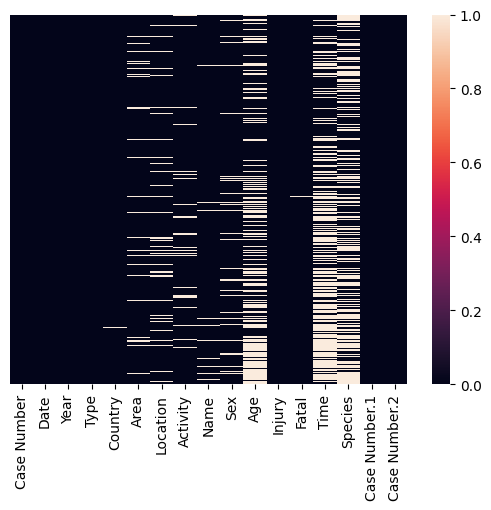

In [ ]:
import seaborn as sns

sns.heatmap(dados1.isnull(), yticklabels = False) # para observar as colunas que possuem informações nulas

## Criando variável categórica de espécies

In [ ]:
# CRIANDO CATEGORIAS DE ESPÉCIES

# função base pra realizar substituições
def retornar_indices(serie, campo):
  inds = serie.str.lower().str.contains(campo)
  if any(inds.isna()):
    inds = inds.fillna(False)
  return inds.tolist()

def substituir_str_categorias(serie_in, campos):
  # série de índices booleanos pra substituir os campos que não foram indentificados por nan
  serie = serie_in.copy()
  total_inds = pd.Series([True] * serie.shape[0])

  def fazer_substituicao(old_str, new_str):
    inds = retornar_indices(serie, old_str)
    serie[inds] = new_str
    total_inds[inds] = False

  for grupo in campos:
    # condicional caso seja uma lista (mais de um nome para a mesma espécie)
    if isinstance(grupo, dict):
      for el in list(grupo.values())[0]:
        fazer_substituicao(el, list(grupo.keys())[0])
    elif isinstance(grupo, list):
      for el in grupo:
        fazer_substituicao(el, grupo[0])
    else:
      fazer_substituicao(grupo, grupo)

  # substituindo os campos em que não foram encontradas as categorias
  serie[total_inds.tolist()] = np.nan

  return serie

In [ ]:
# Ajuste dos dados da coluna 'Species'

# espécies identificadas
species_categories = [
    'white', 'gill', 'tiger', 'lemon', 'bull', 'caribbean reef', 'grey reef', 'blacktip', 'mako',
    'sandtiger', 'galapagos', 'spinner', 'hammerhead', 'blacktip', 'bronze whaler', 'blue', 'raggedtooth',
    'goblin', ['whitetip', 'Whtietip']  , 'nurse', ['Seven-gill', '7-gill', 'sevengill'],'zambezi',
    'thresher', 'wobbegong', 'basking', 'angel', 'copper', 'black tipped', 'porbeaggle','silky', 'dusky',
    'carpet', 'shortfin', 'yellow belly', 'gummy', 'leopard', 'blue nosed', 'whaler', 'shortfin']

# palavras-chave que indicam não existir certeza sobre a espécie
doubt_categories = ['involvment', 'possibly', 'suspected', 'unlikely', 'not confirmed', 'unknown',
                     'doubtful', 'either', 'questionable', 'thought to involve', 'not confirmed', 'hoax']

# copiando coluna
dados1['especies'] = dados1['Species']

# eliminando campos que contenham as palavras-chave de dúvida
for el in doubt_categories:
  dados1['especies'][retornar_indices(dados1['especies'], el)] = np.nan

# substituindo os campos que não tem espécie de tubarão por nan
dados1['especies'] = substituir_str_categorias(dados1['especies'], species_categories)

dados1['especies'].unique()

array(['white', 'gill', nan, 'tiger', 'lemon', 'bull', 'caribbean reef',
       'wobbegong', 'blacktip', 'blue', 'nurse', 'angel', 'mako',
       'whaler', 'grey reef', 'silky', 'galapagos', 'spinner',
       'hammerhead', 'raggedtooth', 'goblin', 'thresher', 'dusky',
       'basking', 'copper', 'black tipped', 'leopard', 'zambezi',
       'carpet', 'yellow belly', 'gummy'], dtype=object)

In [ ]:
# Mapear os valores únicos para cada espécie

mapeamento = {'white': 0, 'tiger': 1, 'bull': 2, 'nurse': 3, 'blacktip': 4, 'whaler': 5, 'mako': 6, 'blue': 7,
              'raggedtooth': 8, 'wobbegong': 9, 'hammerhead': 10, 'lemon': 11, 'grey reef': 12, 'gill': 13,
              'caribbean reef': 14, 'spinner': 15, 'dusky': 16, 'carpet': 17, 'copper': 18, 'basking': 19,
              'galapagos': 20, 'angel': 21, 'thresher': 22, 'silky': 23, 'goblin': 24, 'leopard': 25,
              'zambezi': 26, 'black tipped': 27, 'yellow belly': 28, 'gummy': 29}

# Criar a nova coluna 'n_especie' usando o mapeamento
dados1['n_especie'] = dados1['especies'].map(mapeamento)

## Criando variável categórica de atividades

In [ ]:
# Tratamento dos dados da coluna 'Activity'

categorias_atividades = [{'bathing and swimming': ['swimming', 'floating', 'bathing', 'playing', 'standing']},
                         ['surfing','board', 'surfng', 'scurfing'],
                         ['fishing', 'lobstering', 'shrimping'],
                         {'sailing and onboard activities': ['sailing', 'kayak', 'rowing', 'boat', 'raft']},
                         ['diving', 'snorkel'],
                         {'photographing': ['photo', 'selfie']},
                         'disaster']
# listar atividades contendo shark

dados1['atividades'] = substituir_str_categorias(dados1['Activity'], categorias_atividades)
dados1[['Activity', 'atividades']]

,Activity,atividades
0,Body boarding,surfing
1,Surfing,surfing
2,Surfing,surfing
3,Surfing,surfing
4,Spearfishing,fishing
...,...,...
5142,Ship Mariston torpedoed & sunk,NaN
5143,Swimming beside launch,bathing and swimming
5144,Swimming,bathing and swimming
5145,Diving for pearls,diving


In [ ]:
# Mapear os valores únicos para cada atividade

mapeamento_atividades = {'surfing': 0, 'bathing and swimming': 1, 'fishing': 2, 'diving': 3, 'sailing and onboard activities': 4,
                         'disaster': 5, 'photographing': 6}

# Criar a nova coluna 'n_especie' usando o mapeamento
dados1['n_atividade'] = dados1['atividades'].map(mapeamento_atividades)

## Tratamento de idades

In [ ]:
# Tratamento dos dados da coluna 'Age'

def extrair_numeros(texto):
  # extrai número de 1 ou 2 algarismos ou "?"", exceto se a "?" for precedida por numero
  padrao = r"\b\d{1,2}|(?<![0-9])\?"
  # aplica float pros números e aplica nan para "?". Retorna uma lista
  return [float(n) if n != '?' else np.nan for n in re.findall(padrao, texto)]

age = dados1['Age'].fillna('')
numeros = age.apply(extrair_numeros)

# tratando casos de "to" e "or" como a média entre 2 números
indb = age.str.contains("to") | age.str.contains("or")
numeros[indb] = numeros[indb].apply(lambda x : [round(np.mean(x))])
# numeros[indb]

# tratando casos month como decimais
indb = age.str.contains("months")
numeros[indb] = numeros[indb].apply(lambda x: [x[0]/12])
# numeros[indb]

numeros

0       [48.0]
1           []
2       [19.0]
3       [30.0]
4           []
         ...  
5142        []
5143        []
5144        []
5145        []
5146        []
Name: Age, Length: 5143, dtype: object

In [ ]:
# fazendo atribuições e criando variaveis adicionais

dados1['idades'] = numeros
dados1['n_vitimas'] = numeros.apply(len).replace(0,1)
# dados1[['idades', 'n_vitimas']]

# dataframe planificado (matriz de idades n linhas por 6)
idades_frame = dados1['idades'].apply(pd.Series)
display(idades_frame)
# idades de forma sequencial (para plotagem). Atenção, os índices não correspondem a data1
idades_lista = dados1['idades'].explode()
display(idades_lista)

,0,1,2,3,4,5
0,48.0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,19.0,NaN,NaN,NaN,NaN,NaN
3,30.0,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
5142,NaN,NaN,NaN,NaN,NaN,NaN
5143,NaN,NaN,NaN,NaN,NaN,NaN
5144,NaN,NaN,NaN,NaN,NaN,NaN
5145,NaN,NaN,NaN,NaN,NaN,NaN


0       48.0
1        NaN
2       19.0
3       30.0
4        NaN
        ... 
5142     NaN
5143     NaN
5144     NaN
5145     NaN
5146     NaN
Name: idades, Length: 5172, dtype: object

## Tratamento dados binários de fatalidade


In [ ]:
sexo = pd.get_dummies(dados1['Sex'], drop_first=True)

valores = ['UNKNOWN', '2017', ' N', 'F']
dados1 = dados1[~dados1['Fatal'].isin(valores)] # '~' nega a condição '.isin(valores)'

fatalidade = pd.get_dummies(dados1['Fatal'], drop_first=True)

In [ ]:
dados1 = pd.concat([dados1, sexo, fatalidade], axis=1) # concatena os dados

dropval = ['Sex', 'Fatal'] # colunas a serem dropadas

dados1.drop(dropval, axis=1, inplace=True) # descarta as colunas não necessárias

In [ ]:
dados1.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Age,...,Case Number.1,Case Number.2,especies,n_especie,atividades,n_atividade,idades,n_vitimas,M,Y
0,2017.06.11,2017-06-11,2017.0,Unprovoked,AUSTRALIA,Western Australia,"Point Casuarina, Bunbury",Body boarding,Paul Goff,48,...,2017.06.11,2017.06.11,white,0.0,surfing,0.0,[48.0],1.0,1,0.0
1,2017.06.10.b,2017-06-10,2017.0,Unprovoked,AUSTRALIA,Victoria,"Flinders, Mornington Penisula",Surfing,female,NaN,...,2017.06.10.b,2017.06.10.b,gill,13.0,surfing,0.0,[],1.0,0,0.0
2,2017.06.10.a,2017-06-10,2017.0,Unprovoked,USA,Florida,"Ponce Inlet, Volusia County",Surfing,Bryan Brock,19,...,2017.06.10.a,2017.06.10.a,NaN,NaN,surfing,0.0,[19.0],1.0,1,0.0
3,2017.06.07.R,Reported 07-Jun-2017,2017.0,Unprovoked,UNITED KINGDOM,South Devon,Bantham Beach,Surfing,Rich Thomson,30,...,2017.06.07.R,2017.06.07.R,NaN,NaN,surfing,0.0,[30.0],1.0,1,0.0
4,2017.06.04,2017-06-04,2017.0,Unprovoked,USA,Florida,"Middle Sambo Reef off Boca Chica, Monroe County",Spearfishing,Parker Simpson,NaN,...,2017.06.04,2017.06.04,NaN,NaN,fishing,2.0,[],1.0,1,0.0


## Obtenção e tratamento de dados de comprimento de linha de costa (dados externos)

In [ ]:
# baixando dados de linha de costa dos países
linha_costa_site = pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_by_length_of_coastline')[0]

linha_costa = pd.DataFrame()
linha_costa['Pais'] = linha_costa_site['Country'].copy()
linha_costa['Comprimento'] = linha_costa_site['The World Factbook[2]']['km'].copy()

In [ ]:
# Tratando dados da wikipedia  (World Factbook)

# função pra eliminar comentários contidos em colchetes e vírgulas
def remover_colchetes(texto):
  return re.sub(r"\[.*?\]|,", "", texto)

linha_costa = linha_costa.dropna()
linha_costa['Pais'] = linha_costa['Pais'].apply(remover_colchetes)
# convertendo pra dados numéricos. Substituíndo vazio por 0
linha_costa['Comprimento'] = linha_costa['Comprimento'].apply(remover_colchetes).\
  apply(lambda x: (float(x) if x != '' else 0))

# eliminando países sem linha de costa
linha_costa = linha_costa[linha_costa['Comprimento'] != 0]
# mundando o índice para nome do país
linha_costa = linha_costa.drop(index=0)

# linha_costa.set_index('Pais').to_csv(basedir + 'linha_de_costa.csv')

In [ ]:
# encontrando interseção entre os nomes de países nos dados de tubarão e nos dados de linha de costa

paises_original = dados1['Country'].str.strip().str.lower()
paises_linha =  linha_costa['Pais'].str.strip().str.lower()

intersecao_simples = set(paises_original) & set(paises_linha)
intersecao_simples = pd.Series(list(intersecao_simples))

# países em dados1 mas não em linha_costa
paises_sem_match = paises_original[~paises_original.isin(intersecao_simples)].dropna().unique()
paises_sem_match = pd.Series(paises_sem_match)
# 71 países não encontrados

# eliminando campos com ocean e sea (não são países)
paises_sem_match = paises_sem_match[~(paises_sem_match.str.contains(' ocean') | paises_sem_match.str.contains(' sea'))]

In [ ]:

# algoritmo para encontrar strings similares. Referências:
# http://www.catalysoft.com/articles/StrikeAMatch.html
# https://stackoverflow.com/questions/653157/a-better-similarity-ranking-algorithm-for-variable-length-strings
# avalia pares de caracteres com translação

def get_bigrams(string):
  '''
  Takes a string and returns a list of bigrams
  '''
  s = string.lower()
  return {s[i:i+2] for i in range(len(s) - 1)}

def string_similarity_bigrams(str1, str2):
  '''
  Perform bigram comparison between two strings
  and return a percentage match in decimal form
  '''
  pairs1 = get_bigrams(str1)
  pairs2 = get_bigrams(str2)
  return (2.0 * len(pairs1 & pairs2)) / (len(pairs1) + len(pairs2))


In [ ]:
def escolher_str_similar(pais_dados, preambulo=''):
  """
  Elenca 5 strings similares de paises nos dados de linha de costa para escolher
  com dígitos de 0 a 5. 'ENTER' é considerado como 0 (primeiro valor).
  Digitar <string> insere alternativamente a string fornecida pelo usuário
  Digitar 'x' prenche com string vazia ('').
  """
  poss_inds = linha_costa['Pais'].apply(lambda x: string_similarity_bigrams(pais_dados, x)).\
    sort_values(ascending=False).head(5).index
  poss_matches = linha_costa['Pais'].loc[poss_inds]
  opcoes = {n:value for n, value in enumerate(poss_matches)}
  opt = input(f"{preambulo}{pais_dados} | {opcoes}: ")

  if opt == "":
    resultado = opcoes[0]
  elif opt.isdigit():
    if int(opt) in range(5):
      resultado = opcoes[int(opt)]
    else:
      resultado = ""
  elif opt == "x":
    resultado =  ""
  else:
    resultado = opt
  # elif opt[:1] == "i ":
    # resultado = opt[2:].strip()

  return resultado, opt

def encontrar_matches_paises():
  matches_paises = pd.DataFrame(columns=['original', 'input', 'match'])
  matches_paises['original'] = paises_sem_match.copy()

  for n, el in enumerate(paises_sem_match):
    print(f"{n+1}/{len(paises_sem_match)} > ", end='')
    matches_paises['match'].iloc[n], matches_paises['input'].iloc[n]  = escolher_str_similar(el)

  return matches_paises

# precisa de input do usuário. Resultados estão salvos em arquivo
# matches_paies = encontrar_matches_paises()

# matches_paises.to_csv('paises_match_linha_de_costa.csv', index=False)

In [ ]:
!gdown '1-Ggxih6OyeOX7AMTSX1FWbQ88_3Xs4u5'

matches_paises = pd.read_csv('paises_match_linha_de_costa.csv').iloc[:,1:]
matches_paises

Downloading...
From: https://drive.google.com/uc?id=1-Ggxih6OyeOX7AMTSX1FWbQ88_3Xs4u5
To: /content/paises_match_linha_de_costa.csv
100% 1.66k/1.66k [00:00<00:00, 7.69MB/s]


,original,input,match
0,usa,United States,United States
1,bahamas,NaN,Bahamas The
2,reunion,x,NaN
3,"st helena, british overseas territory",1,Saint Helena Ascension and Tristan da Cunha
4,england,United Kingdom,United Kingdom
5,columbia,NaN,Colombia
6,st. martin,NaN,Saint Martin
7,trinidad & tobago,NaN,Trinidad and Tobago
8,diego garcia,x,NaN
9,taiwan,4,Republic of China (Taiwan)


In [ ]:
matches_paises = pd.read_csv('paises_match_linha_de_costa.csv').iloc[:,1:]

# montando dicionário para substituir paises de dados1 por países de linha de costa
paises_eq = {v.upper(): v for _, v in linha_costa['Pais'][paises_linha.isin(intersecao_simples)].iteritems()}

# equivalencias encontradas interativamente
paises_eq.update(
    {v['original'].upper(): v['match'] for _, v in matches_paises.iterrows()}
)

# coluna nova
dados1['paises_lc'] = dados1['Country'].replace(paises_eq).replace()

dados1['paises_lc'][~dados1['paises_lc'].isin(list(paises_eq.values()))] = np.nan


# Desenvolvimento da atividade

## Probabilidades, variáveis aleatórias e funções de probabilidade

Nosso interesse inicial pelo dataset de ataques era investigar as ocorrências e as probabilidades relacionadas aos ataques no estado de Pernambuco, que apesar se ser raro, é ser um tema presente no nosso cotidiano e que no último verão (2023) acabou ficando em evidência novamente devido a novas ocorrências de nas praias de Piedade e Olinda. Com isso, as investigações através das probabilidades seguem nas seções abaixo.

### Probabilidade Simples


Qual a probabilidade de um ataque ser fatal?

In [ ]:
risco_fat = sum(dados1['Y'] == 1)/len(dados1)

print('A probabilidade de um ataque ser fatal entre 1917-2017 no mundo é',
      str(round(risco_fat*100,2)) + ' %')

A probabilidade de um ataque ser fatal entre 1917-2017 no mundo é 20.71 %


### Probabilidade da união

Qual a probabilidade de ter sofrido um ataque em Boa Viagem ou em Piedade?

In [ ]:
prob_fat_BVPI = len(dados1[(dados1['Location'] == "Boa Viagem") | (dados1['Location'] == "Piedade")]) / len(dados1)

print('A probabilidade de ter sofrido um ataque em Boa Viagem ou em Piedade entre 1917-2017 é de', str(round(prob_fat_BVPI*100,2)) + '%')

A probabilidade de ter sofrido um ataque em Boa Viagem ou em Piedade entre 1917-2017 é de 0.87%


### Probabilidade da diferença

Qual a probabilidade de ter sofrido um ataque em Boa Viagem e não em Piedade?

In [ ]:
prob_fat_BVnPI = len(dados1[dados1['Location'] == "Boa Viagem"]) / len(dados1)

print('A probabilidade de ter sofrido um ataque em Boa Viagem e não em Piedade entre 1917-2017 é de', str(round(prob_fat_BVnPI*100,2)) + '%')

A probabilidade de ter sofrido um ataque em Boa Viagem e não em Piedade entre 1917-2017 é de 0.45%


### Probabilidade da intersecção

Qual a probabilidade de um ataque ter sido fatal e ter ocorrido em Pernambuco?

In [ ]:
# Cálculo do evento (A inter B): probabilidade de um ataque ser fatal (e) ter sido em Pernambuco
prob_fat_PE = len(dados1[(dados1['Area'] == "Pernambuco") & (dados1['Y'] == 1)])/len(dados1) # o denominador são todos os ataques no mundo

print('A probabilidade de um ataque ser fatal e ter sido em Pernambuco entre 1917-2017 é de',
      str(round(prob_fat_PE*100,2)) + '%')

A probabilidade de um ataque ser fatal e ter sido em Pernambuco entre 1917-2017 é de 0.58%


### Probabilidade do complemento

Qual a probabilidade de um ataque ter sido fatal e não ter ocorrido em Pernambuco?

In [ ]:
prob_fat_NPE = risco_fat - prob_fat_PE

print('A probabilidade de um ataque não ser fatal e ter sido em Pernambuco entre 1917-2017 é igual a: ',
      str(round(prob_fat_NPE*100,2)) + '%')

A probabilidade de um ataque não ser fatal e ter sido em Pernambuco entre 1917-2017 é igual a:  20.12%


### Probabilidade condicional

Qual a probabilidade de um ataque ter sido em Pernambuco dado que o ataque foi fatal?

In [ ]:
# Proporção entre ataques fatais (1) e não fatais (0)
dados1[dados1['Area'] == "Pernambuco"]["Y"].value_counts(normalize=True)

0.0    0.577465
1.0    0.422535
Name: Y, dtype: float64

In [ ]:
# Evento A: probabilidade do ataque ter sido fatal
# Evento B: probabilidade de um ataque ter sido em Pernambuco
# Evento (A inter B): probabilidade de um ataque ser fatal (e) ter sido em Pernambuco
# Evento B|A: probabilidade de ter sido em Pernambuco dado que o ataque foi fatal

probCond = prob_fat_PE/risco_fat

print('Dado que o ataque foi fatal, a probabilidade dele ter ocorrido em Pernambuco entre 1917-2017 é: ',
      str(round(probCond*100,2)) + '%')

Dado que o ataque foi fatal, a probabilidade dele ter ocorrido em Pernambuco entre 1917-2017 é:  2.82%


### Teorema de Bayes

Qual a probabilidade de um ataque ter sido fatal dado que ocorreu em Pernambuco?

In [ ]:
probPE = len(dados1[dados1['Area'] == "Pernambuco"])/len(dados1) # o denominador são todos os ataques no mundo

print('A probabilidade de um ataque ter sido em Pernambuco entre 1917-2017 é de',
      str(round(probPE*100,2)) + '%')

A probabilidade de um ataque ter sido em Pernambuco entre 1917-2017 é de 1.38%


In [ ]:
# Evento A: probabilidade de ter sido em Pernambuco
# Evento B: probabilidade de ter sido fatal

prob_bayes = (risco_fat * probCond)/probPE

print('A probabilidade de um ataque ter sido fatal dado que ocorreu em Pernambuco entre 1917-2017 é de',
      str(round(prob_bayes*100,2)) + '%')

A probabilidade de um ataque ter sido fatal dado que ocorreu em Pernambuco entre 1917-2017 é de 42.25%


### Variáveis aleatórias

Com o objetivo de complementar o conjunto de dados, foram obtidos dados de comprimento de linha de costa por país. Esses dados foram considerados porque um maior comprimento de linha de costa poderia estar associado à um maior número de ataques. Para considerar esse efeito, foi idealizada uma nova variável aleatória que representa a razão entre o número de ataques pelo comprimento de linha de costa de cada país.

In [ ]:
na_paises = dados1.groupby('paises_lc').size()
na_paises.sort_values(ascending=False).head(10)

na_paises.name = 'Num de ataques'
ataques_paises = pd.merge(na_paises, linha_costa.set_index('Pais'), left_index=True, right_index=True, how='inner')

ataques_paises['Ratio'] = ataques_paises['Num de ataques'] / ataques_paises['Comprimento']
ataques_paises

,Num de ataques,Comprimento,Ratio
American Samoa,3,116.0,0.025862
Angola,1,1600.0,0.000625
Antigua and Barbuda,1,153.0,0.006536
Argentina,1,4989.0,0.000200
Aruba,1,68.5,0.014599
...,...,...,...
Uruguay,1,660.0,0.001515
Vanuatu,10,2528.0,0.003956
Venezuela,9,2800.0,0.003214
Vietnam,10,3444.0,0.002904


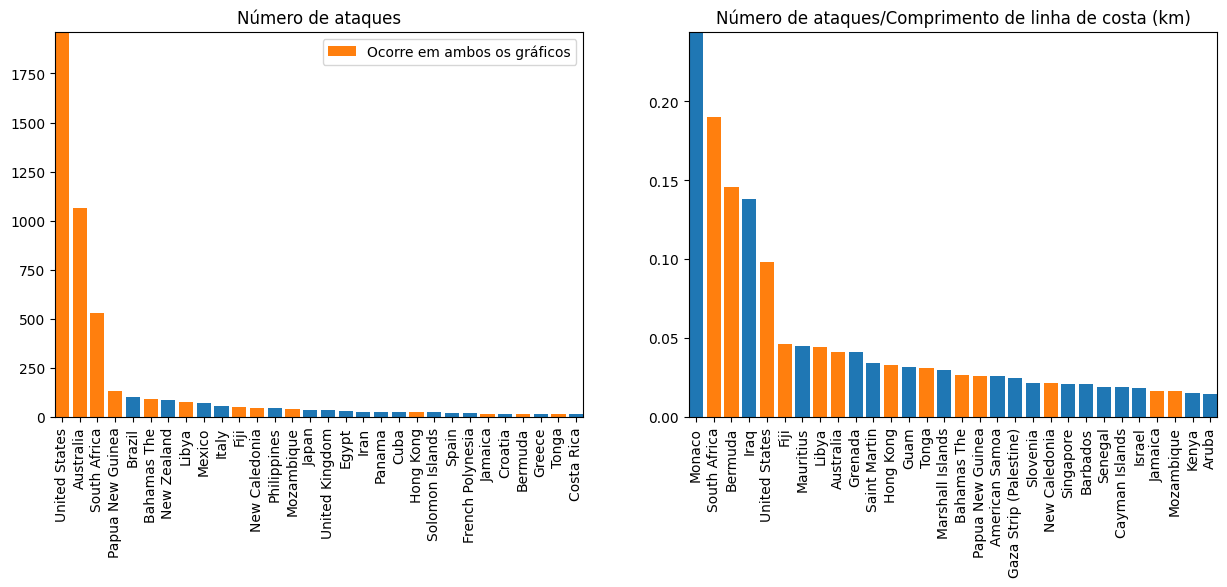

In [ ]:
barra = []
barra += [ataques_paises['Num de ataques'].sort_values(ascending=False).head(30)]
barra += [ataques_paises['Ratio'].sort_values(ascending=False).head(30)]

inter_colunas = list(set(barra[0].index) & set(barra[1].index))

cor2, cor1 = cm.tab10.colors[:2]

fnc_lista_cores = lambda indices: [cor1 if el in inter_colunas else cor2 for el in indices]

fig, ax = plt.subplots(1,2, figsize=(15, 5))

for n, br in enumerate(barra):
  ax[n].bar(br.index, br, color=fnc_lista_cores(br.index))
  ax[n].set_xticklabels(br.index, rotation='vertical')
  ax[n].autoscale(tight=True)

ax[0].set_title('Número de ataques')
ax[1].set_title('Número de ataques/Comprimento de linha de costa (km)')

ax[0].legend(['Ocorre em ambos os gráficos'])

O índice obtido ordenado indica países que mesmo com o comprimento de linha de costa comparativamente menor, tiveram alta proporção de ataques. Dessa forma, países que não figuravam entre os 30 com mais ataques, como Monaco e Iraque, obtiveram mais destaque. Outros países com número de ataques abaixo de 200 ficaram em posições mais elevadas, como a África do Sul e Bermuda. Possivelmente, outro índice relevante pode ser a razão entre o número de ataques e a população de cada país.

O dataset também contém informações sobre ataques de tubarão, incluindo a espécie de tubarão envolvida em cada ataque. Ao analisar os dados, podemos observar que existem várias espécies de tubarão registradas nos ataques. A distribuição dos ataques por espécie de tubarão é variada, com algumas espécies sendo mais frequentes do que outras.

Ao representar graficamente o número de ataques por espécie de tubarão em um gráfico de barras, é possível visualizar a quantidade relativa de ataques associados a cada espécie. Isso nos permite identificar quais espécies de tubarão estão mais envolvidas em ataques e se há alguma espécie que se destaca.

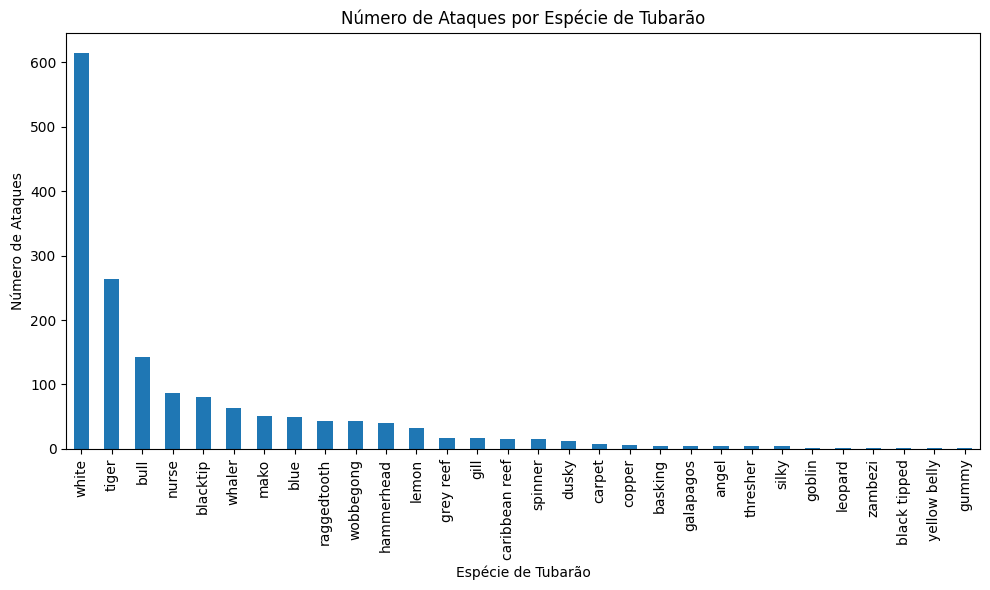

In [ ]:
ataques_por_especie = dados1['especies'].value_counts()

plt.figure(figsize=(10, 6))
ataques_por_especie.plot(kind='bar')
plt.xlabel('Espécie de Tubarão')
plt.ylabel('Número de Ataques')
plt.title('Número de Ataques por Espécie de Tubarão')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Função probabilidade e função repartição

Qual a probabilidade de um ataque de tubarão de espécie conhecida ser de cada espécie? Foi calculada a função probabilidade e a função repartição (cumulativa).

Text(0.5, 0.98, 'Probabilidade de ataque de tubarão por espécie')

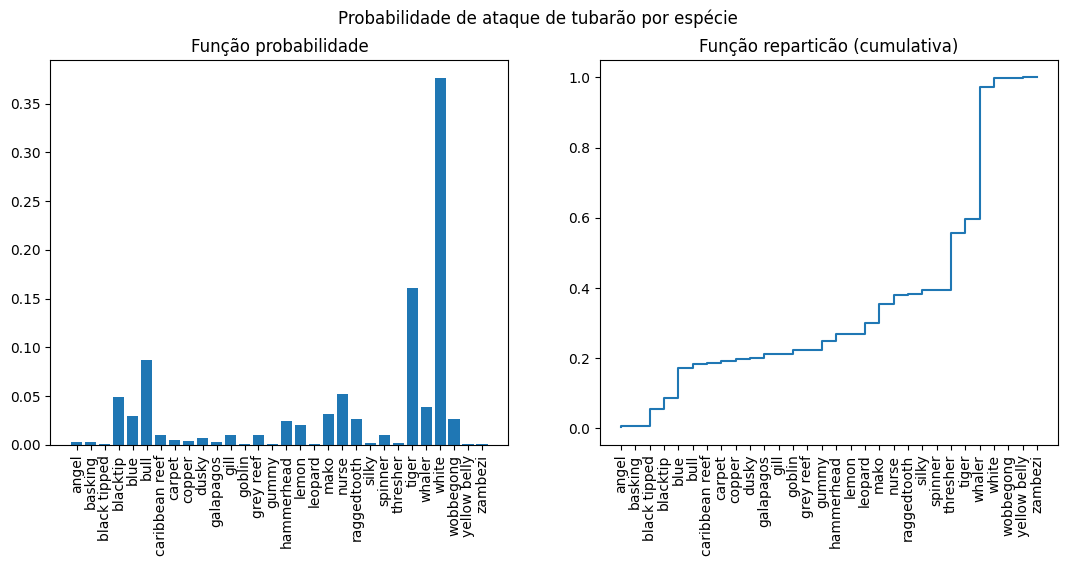

In [ ]:
# função probabilidade de ser atacado por uma espécie
def calc_fp_fpc(series):
  fp = series.value_counts(sort=False).sort_index()/series.shape[0]
  return fp, fp.cumsum()

def plotar_fp_fpc(serie):

  fp, fpc = calc_fp_fpc(serie)

  fig, ax = plt.subplots(1,2, figsize=(13, 5))

  ax[0].set_title('Função probabilidade')
  ax[0].bar(fp.index, fp)

  ax[1].step(fpc.index, fpc)
  ax[1].set_title('Função reparticão (cumulativa)')

  for axx in ax:
    axx.set_xticklabels(fpc.index, rotation='vertical')

  return fig, ax

fig, ax = plotar_fp_fpc(dados1['especies'].dropna())

fig.suptitle('Probabilidade de ataque de tubarão por espécie')

A probabilidade de um ataque de tubarão (de espécie conhecida) ser de um tubarão branco é superior a 35% e a probabilidade de um ataque de tubarão tigre é superior a 15%. Adicionamente, foram calculadas a função probabilidade das vítima serem de cada idade entre 0 e 87 anos.

Text(0.5, 0.98, 'Probabilidade de ataque por idade')

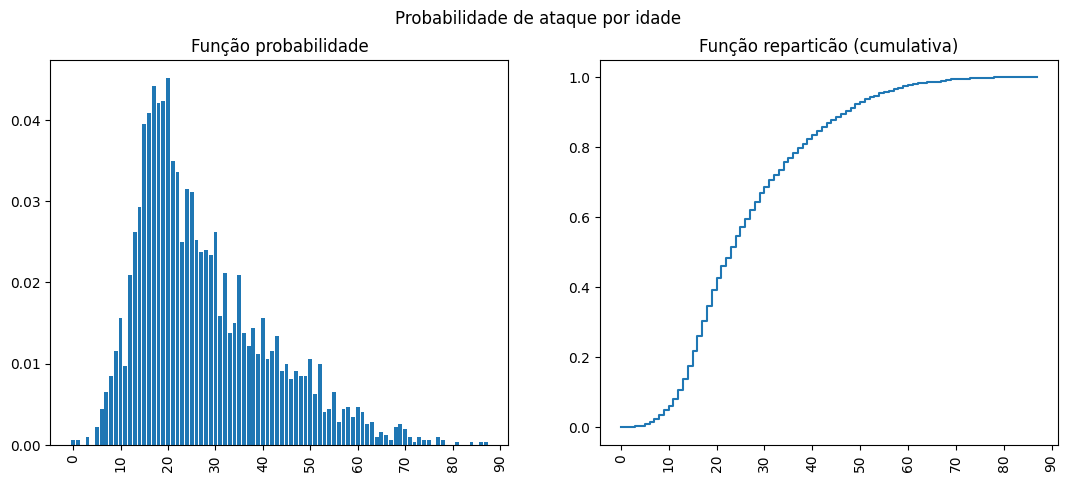

In [ ]:
idades = dados1['idades'].explode().dropna().astype(int)

fig, ax = plotar_fp_fpc(idades)

for axx in ax:
  axx.set_xticks(np.arange(0,91, 10), np.arange(0,91, 10))

fig.suptitle('Probabilidade de ataque por idade')

## Estatística Descritiva


### Histogramas

Pretendiamos explorar o histórico de ataques em Pernambuco para averiguar se a construção do porto de suape teve impacto nestes ataques. Notamos um crescimento enorme nos anos de sua implantação e inicio de operação comercial (década de 80,90) que pode ser observado no histograma abaixo:

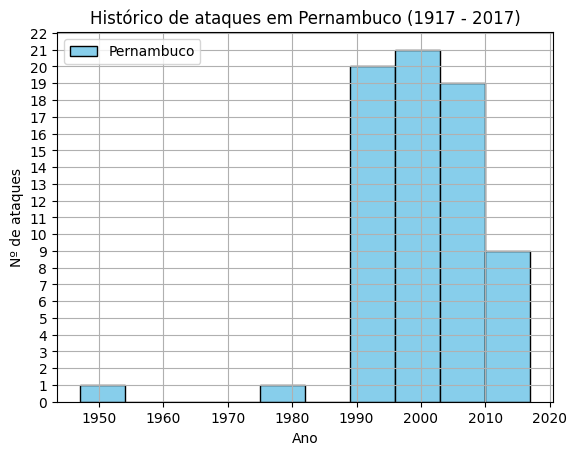

In [ ]:
histPE = dados1[dados1['Area'] == 'Pernambuco']['Year']

plt.hist(histPE, bins=10, color='skyblue', edgecolor='black')  # Define o número de bins e as cores

# Configurações
plt.xlabel('Ano')
plt.ylabel('Nº de ataques')
plt.title('Histórico de ataques em Pernambuco (1917 - 2017)')  # Define o título do gráfico
plt.yticks(range(0, int(max(plt.yticks()[0])) + 1, 1)) # para tornar os valores do eixo 'y' inteiros na plotagem
plt.legend(['Pernambuco'])
plt.grid(True)

plt.show()

As praias de Pernambucanas, principalmente Boa Viagem e Piedade estão entre os top 5 locais no mundo em ocorrências de ataque entre 1917 e 2017, o que pode ser observado pelo histograma abaixo:

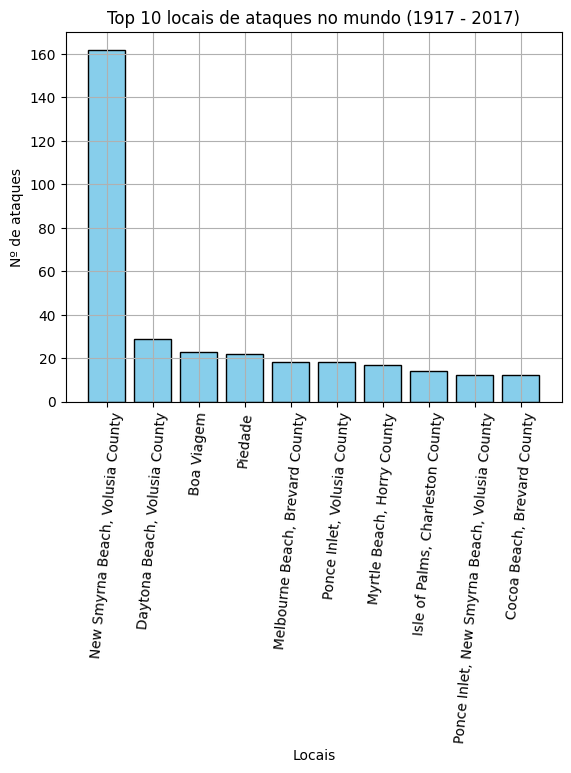

In [ ]:
RankLoc = dados1['Location'].value_counts().head(10)

plt.bar(RankLoc.index, RankLoc.values, color='skyblue', edgecolor='black')

# Configurações
plt.xlabel('Locais')
plt.ylabel('Nº de ataques')
plt.title('Top 10 locais de ataques no mundo (1917 - 2017)')
plt.xticks(rotation=85)

plt.grid(True)
plt.show()

Para compreender a distribuição de idades das pessoas atacadas, foi produzido o histograma abaixo, indicativo do perfil de idades com maior frequência de ataques

In [ ]:
fig = px.histogram(idades_lista.dropna(), marginal='box')

fig.update_layout(title='Histograma de idades de pessoas atacadas',
                  showlegend=False,
                  xaxis_title= 'Idade',
                  yaxis_title='Quantidade',
                  width=1000, height=600,
                  )

fig.show()

A distribuição de quantidade de ataques por idade sobe rapidamente até um máximo de ataques em 16 anos e depois cai lentamente até os 86 anos com poucos ataques. A forma da distribuição se assemelha à forma de uma distribuição qui-quadrado ou gamma. Por ter muitos outliers como idades acima dos 70, a mediana encontrada de 24 anos pode ser mais representativa da distribuição do que a média. Os quartis indicam que 50% dos ataques ocorrem em vítimas entre 17 e 35 anos. Comparando a distribuição de idades da população mundial disponível em https://www.populationpyramid.net/, pode-se sugerir que o menor número de ataques para idades acima dos 16 está relacionado ao menor número de índividuos passivos de serem atacados.

### Scatter Plot
Realização de um scatter plot para avaliar a relação entre o comprimento de linha de costa e o número de ataques por país

In [ ]:
# investigando relação entre comprimento de linha de costa e número de ataques.

fig = px.scatter(ataques_paises.reset_index(), x='Comprimento', y='Num de ataques', hover_data=['index'], width= 1200, height=400)

# 100, 20000
fig.show()

A análise indicou que não há relação muito clara entre o comprimento de linha de costa e o número de ataques em cada país. No entanto, a análise foi útil para identificar outliers que indicam vieses nos dados. Nos Estados Unidos, por exemplo, foram registrados 1961 ataques apesar do comprimento de linha de costa de cerca de 20 mil quilômetros que ocorre possivelmente por causa da grande quantidade de registros realizados no país. Em contrapartida, o Canada possui apenas 7 ataques e o maior comprimento de linha de costa. Isso ocorre provavelmente porque o comprimento da linha de costa no Canadá é muito inflado devido a contabilização das ilhas ao norte do país. Também se espera que menos casos de ataque ocorram devido à temperatura da água que tende a diminuir a frequência de esportes náuticos e banhistas.

### Box plot

O diagrama box plot foi utilizado para comparar como se distribuem as idades das pessoas atacadas por tubarão separados por atividades dentre os 5 países com maior número de ataques

In [ ]:
dados_boxplot = dados1[['idades','paises_lc', 'atividades']].explode('idades').dropna().reset_index()
dados_boxplot

,index,idades,paises_lc,atividades
0,0,48.0,Australia,surfing
1,2,19.0,United States,surfing
2,3,30.0,United Kingdom,surfing
3,5,32.0,Bahamas The,diving
4,8,73.0,Australia,fishing
...,...,...,...,...
2680,5113,12.0,Australia,bathing and swimming
2681,5117,29.0,Australia,bathing and swimming
2682,5118,47.0,Australia,bathing and swimming
2683,5128,38.0,Australia,fishing


In [ ]:
# 5 paises com maior numero de casos
paises20 = dados_boxplot['paises_lc'].value_counts().head(5).index

dados_boxplot = dados_boxplot[dados_boxplot['paises_lc'].isin(paises20)]
dados_boxplot = dados_boxplot[dados_boxplot['atividades'].isin(['surfing','diving','fishing','bathing and swimming', 'sailing and onboard activities'])]

fig = px.box(dados_boxplot, x='paises_lc', y='idades', color="atividades")

fig.update_layout(xaxis_title='País', yaxis_title='Idade', legend_title='Sexo',
                  title='Distribuição de idades por país e sexo')

fig.update_layout(xaxis={'categoryorder':'array', 'categoryarray':paises20})

fig.show()

De forma geral, a idade de pessoas atacadas realizando atividades de surfe e banhistas é mais baixa do que pessoas atacadas realizando atividades de pescaria, mergulho e navegação. A distribuição de idades de pessoas atacadas realizando atividades de mergulho tendeu para idades mais altas, com as medianas entre 29 e 35. Nenhum ataque ocorreu nas Bahamas relacionado á atividades de surfe, provavelmente porque a atividade não é realizada nesse país. Ataques em pessoas realizando atividades de navegação não ocorreram na África do Sul, Bahamas e Brasil.

### Mapa de calor para correlação
 correlação é uma medida padronizada que indica a força e a direção da relação linear entre duas variáveis.

 Colunas correlacionadas:

*   Male: sexo, sendo 1 (masculino) e 0 (feminino)
*   fatalidade: ataque fatal (1) ou não fatal (0);
*   surfing: se a vítima era surfista (1) ou não (0);
*   bath and swim: se a vítima era banhista ou nadador (1) ou não (0)
*   Pernambuco: se a vitima foi atacada em Pernambuco (1) ou não(0). Esta coluna foi utilizada apenas no heatmap para o Brasil.

A escolha destas especificamente busca explorar se ataques fatais estão relacionados com surfistas ou banhistas e também com o sexo da vítima. No caso do heatmap do Brasil, busca entender se estes fatores tbm tem correlações fortes em Pernambuco especificamente, alem da comparação entre as correlaçoes entre os casos no mundo e no Brasil.








In [ ]:
# Criando uma nova coluna para 'surfing', para avalicar correlações
dados1['surfing'] = (dados1['atividades'] == 'surfing').astype(int)
dados1['Pernambuco'] = (dados1['Area'] == 'Pernambuco').astype(int)
dados1['bath and swim'] = (dados1['atividades'] == 'bathing and swimming').astype(int)

In [ ]:
# Renomeando colunas
dados1.rename(columns={'M': 'Male', 'Y':'fatalidade'}, inplace=True)

In [ ]:
dados1['Male'].value_counts(normalize=True)

1    0.79545
0    0.20455
Name: Male, dtype: float64

In [ ]:
# Proporção de ataques fatais entre homens
dados1[dados1['Male'] == 1]['fatalidade'].value_counts(normalize=True)

0.0    0.78998
1.0    0.21002
Name: fatalidade, dtype: float64

In [ ]:
# Proporção de ataques fatais entre mulheres
dados1[dados1['Male'] == 0]['fatalidade'].value_counts(normalize=True)

0.0    0.788746
1.0    0.211254
Name: fatalidade, dtype: float64

In [ ]:
correlation = dados1[['Male', 'fatalidade', 'surfing', 'bath and swim']].corr()



Heatmap de correlações para o mundo:


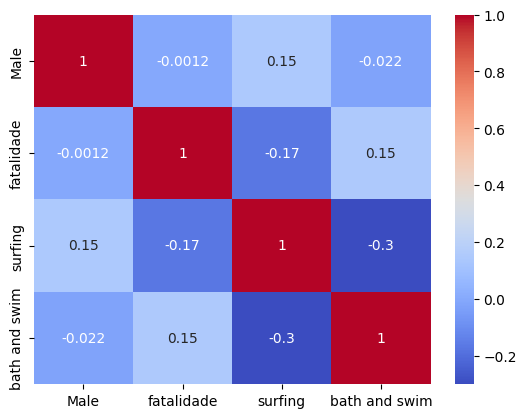

In [ ]:
# heatmap mundo
sns.heatmap(correlation, annot=True, cmap='coolwarm')

# Exibir o heatmap
plt.show()

In [ ]:
dadosBR = dados1[dados1['Country'] == 'BRAZIL'] # correlações no brasil: Male, surfing, fatalidade

In [ ]:
dadosBR[dadosBR['Area'] == 'Pernambuco']['atividades'].value_counts(normalize=False)

surfing                 34
bathing and swimming    26
photographing            1
diving                   1
fishing                  1
Name: atividades, dtype: int64

In [ ]:
correlationBR = dadosBR[['Male', 'fatalidade', 'surfing','bath and swim', 'Pernambuco']].corr()

Heatmap de correlações para o Brasil:

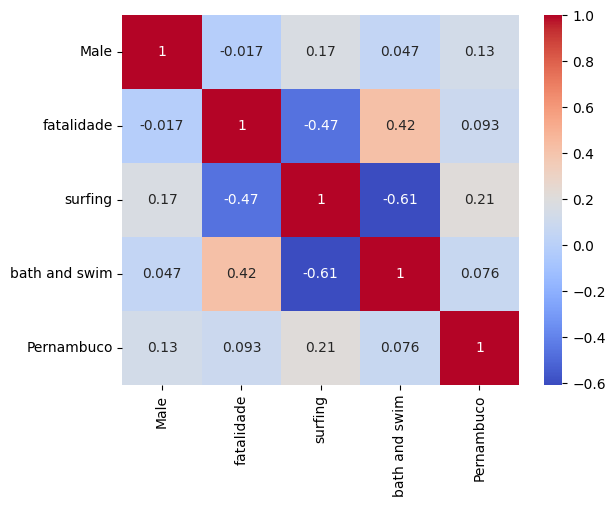

In [ ]:
# heatmap BRASIL
sns.heatmap(correlationBR, annot=True, cmap='coolwarm')

# Exibir o heatmap
plt.show()

Nota-se que não existem correlações significativas entre mortalidade relacionada ao sexo masculino em comparação ao sexo feminino em ambos os heatmaps (das séries globais e séries do Brasil). Também não existe correlação entre surfistas e o gênero das vítimas. A correlação entre fatalidade de banhistas no Brasil é positiva e significativa, enquanto no mundo essa correlação é muito baixa. Atividades de surfe no Brasil apresentou correlação negativa com fatalidade.

## Distribuição Amostral

Buscamos aqui investigar a evolução das médias das idades das vítimas de ataques no mundo todo. Algumas colunas do dataset continham vários dados nulos e discrepantes, requerendo ajustes. Para a investigação das idades, foram feitos processos de ajustes nesta coluna nas seções anteriores. A a população total das idades restantes (tirando os dados nulos) foi de 3182 ocorrências de ataques no mundo todo, e a evolução das médias nas amostras destes dados pode ser observada logo a seguir.

Observa-se que a medida que o tamanho das amostras 'n' aumenta, a tendência das médias amostrais é de aproximar-se da média populacional. Tal comportamento está relacionado com o **Teorema do Limite Central**. Este diz que se amostras aleatórias significativas são retiradas de uma distribuição qualquer, a distribuição das médias amostrais aproxima-se de uma distribuição normal.

Text(0.5, 0.98, 'Distribuição de médias amostrais por tamanho de amostra')

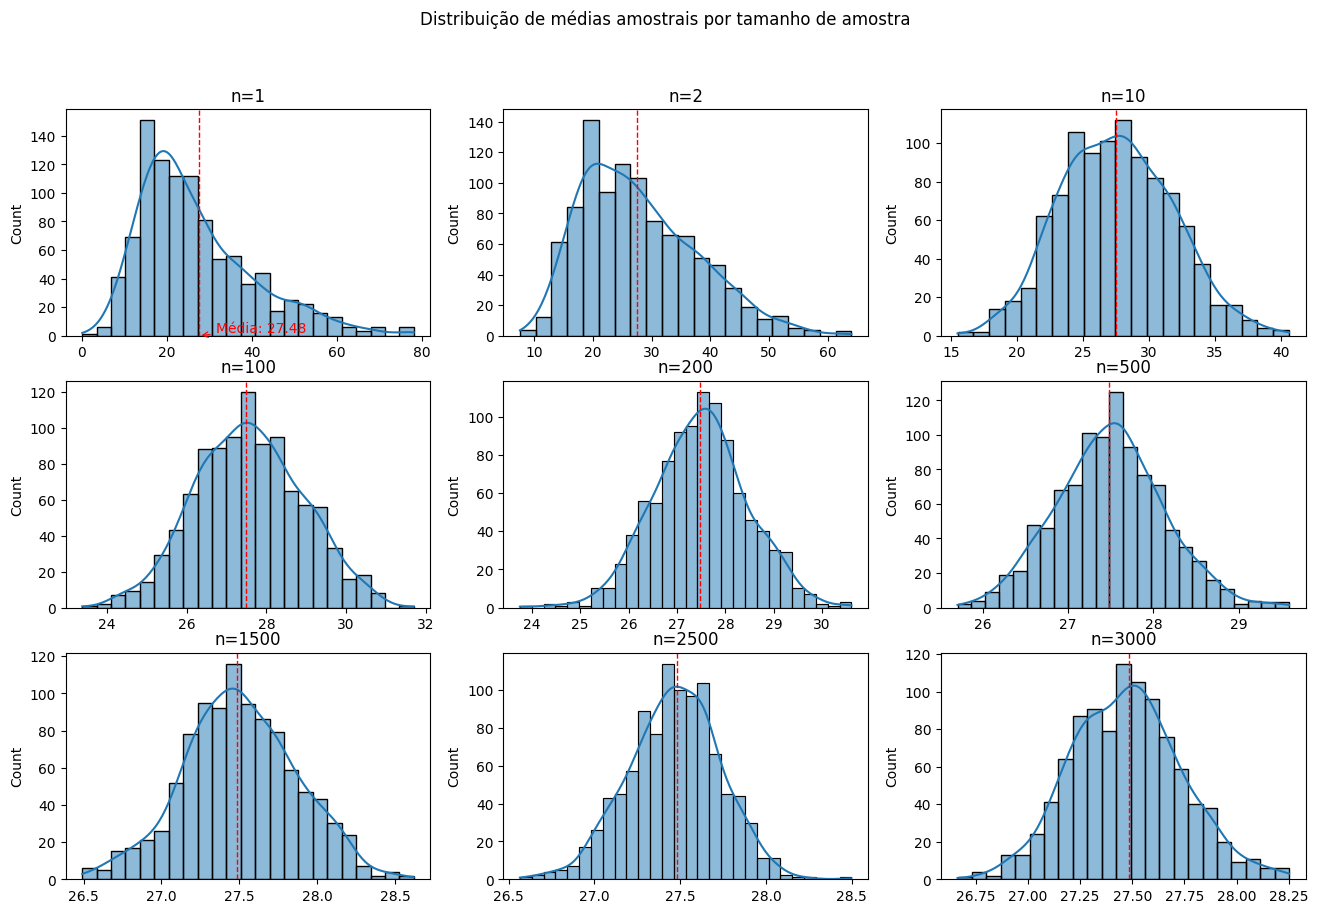

In [ ]:
# PL
# testes extras
idades_lista = idades_lista.dropna()
media = idades_lista.mean()

tamanhos_populacao = [1, 2, 10, 100, 200, 500, 1500, 2500, 3000]

fig, axs = plt.subplots(3, 3, figsize=(16, 10))

# Converter os subplots em uma matriz 1D para facilitar o acesso
axs = axs.ravel()

for n,e in enumerate(tamanhos_populacao):
  ax = axs[n]
  tamanho = tamanhos_populacao[n]
  dist_medias = [np.mean(np.random.choice(idades_lista, size=tamanho, replace=True)) for _ in range(1000)]
  sns.histplot(dist_medias, ax=ax, kde=True)
  # ax.hist(dist_medias)
  ax.set_title(f"n={tamanho}")
  ax.axvline(x=media, color='r', linestyle='--', linewidth=1)
  # ax.set_xlim((0,80))

axs[0].annotate(f"Média: {media:.2f}", xy=(media, 0), xytext=(media + 4, 0.04),
              ha='left', va='bottom', color='r', fontsize=10,
              arrowprops=dict(arrowstyle="->", lw=0.8, color='r'))

plt.suptitle('Distribuição de médias amostrais por tamanho de amostra')

A partir de um tamanho de amostra de 10 indivíduos a maior parte das médias amostrais se aproximam da média populacional e a distribuição é aproximadamente normal. Com o aumento do tamanho das amostras, os valores ficam mais agrupados em torno da média populacional (a variância diminui). Esse comportamento está relacionado ao teorema do limite central que um dos principais fundamentos da estatística.

## Intervalo de Confiança

Seguindo a distribuição amostral das médias feita acima, decidimos calcular o intervalo de confiança para as idades das vítimas de

In [ ]:
# Função para extrair os valores da coluna 'idades' que estão dentro de uma lista
def extrair_valor(lista):
    if isinstance(lista, list) and len(lista) > 0:
        return lista[0] # retorna o valor do primeiro elemento da lista
    else:
        return np.nan

# Aplicar a função a coluna 'idades' substituindo as listas com os valores contidos dentro delas
dados1['idades'] = dados1['idades'].apply(extrair_valor)

In [ ]:
dados1['idades']

0       48.0
1        NaN
2       19.0
3       30.0
4        NaN
        ... 
5044     NaN
5063     NaN
5073     NaN
5100     NaN
5124     NaN
Name: idades, Length: 5143, dtype: float64

In [ ]:
dados1['idades'].head()

0    48.0
1     NaN
2    19.0
3    30.0
4     NaN
Name: idades, dtype: float64

In [ ]:
# Cálculo do intervalo de confiança para as idades das ocorrências de ataques no mundo entre 1917 e 2017

tamanho_amostra = 500

# Seleciona uma amostra aleatória
amostra = np.random.choice(dados1['idades'].dropna(), size=tamanho_amostra, replace=False)

# Média e desvio
media = np.mean(amostra)
desvio_padrao = np.std(amostra)

nivel_conf1 = 0.9
nivel_conf2 = 0.95

# Cálculo dos intervalos de confiança 1 e 2
intervalo_conf1 = stats.t.interval(nivel_conf1, len(amostra)-1, loc=media, scale=desvio_padrao/np.sqrt(len(amostra)))
intervalo_conf2 = stats.t.interval(nivel_conf2, len(amostra)-1, loc=media, scale=desvio_padrao/np.sqrt(len(amostra)))

# Exibe o intervalo de confiança
print(f"Intervalo de Confiança de {nivel_conf1*100}% : P({round(intervalo_conf1[0], 2)} <= \u03BC >= {round(intervalo_conf1[1], 2)})") # '\u03BC' é o Unicode correspondente a letra 'mi'
print(f"Intervalo de Confiança de {nivel_conf2*100}% : P({round(intervalo_conf2[0], 2)} <= \u03BC >= {round(intervalo_conf2[1], 2)})")


Intervalo de Confiança de 90.0% : P(27.07 <= μ >= 29.14)
Intervalo de Confiança de 95.0% : P(26.88 <= μ >= 29.34)


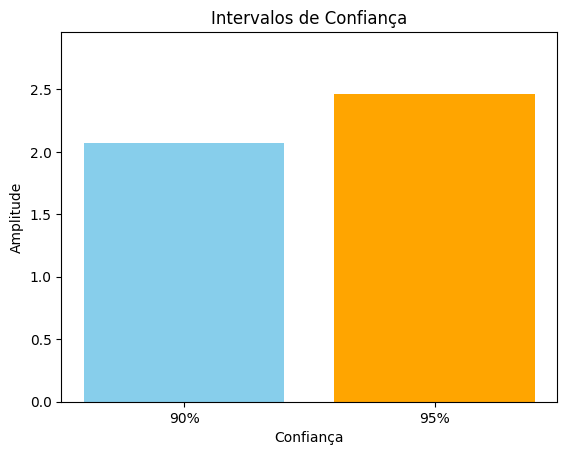

In [ ]:
# Valores dos intervalos de confiança
valores_intervalo_conf1 = [intervalo_conf1[0], intervalo_conf1[1]]
valores_intervalo_conf2 = [intervalo_conf2[0], intervalo_conf2[1]]

# Definição das barras do gráfico
barras = ['90%', '95%']

# Altura das barras
alturas = [valores_intervalo_conf1[1] - valores_intervalo_conf1[0],
           valores_intervalo_conf2[1] - valores_intervalo_conf2[0]]

plt.bar(barras, alturas, color=['skyblue', '#FFA500'])

plt.xlabel('Confiança')
plt.ylabel('Amplitude')
plt.title('Intervalos de Confiança')
plt.ylim(0, max(alturas) * 1.2)

plt.show()

Nota-se que quanto maior o nível de confiança, maior é a amplitude do seu intervalo (gráfico laranja) e quanto menor o nível de confiança, menor a amplitude do intervalo (gráfico azul).